# flood

In [1]:
import porespy as ps
print(ps.filters.flood.__doc__)


    Floods/fills each region in an image with a single value based on the
    specific values in that region.

    The ``mode`` argument is used to determine how the value is calculated.

    Parameters
    ----------
    im : array_like
        An image with isolated regions with numerical values in each voxel,
        and 0's elsewhere.
    regions : array_like
        An array the same shape as ``im`` with each region labeled.  If
        ``None`` is supplied (default) then ``scipy.ndimage.label`` is
        used with its default arguments.
    mode : string
        Specifies how to determine which value should be used to flood
        each region. Options are:

        - 'maximum': Floods each region with the local max in that region
        - 'minimum': Floods each region the local minimum in that region
        - 'median': Floods each region the local median in that region
        - 'mean': Floods each region the local mean in that region
        - 'size': Floods each region wit

## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

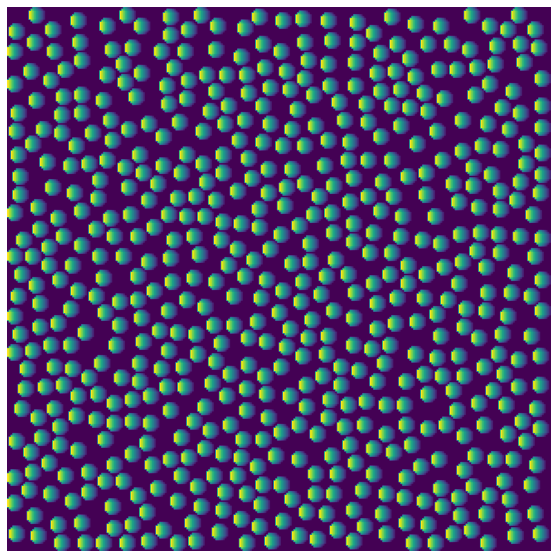

In [3]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=5, volume_fraction=0.9)
im = ps.filters.distance_transform_lin(im, axis = 1, mode = "reverse")
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
regions=None
mode="max"

## Apply filter function:
With different parameters

### regions

Text(0.5, 1.0, 'regions = snow_partitioning')

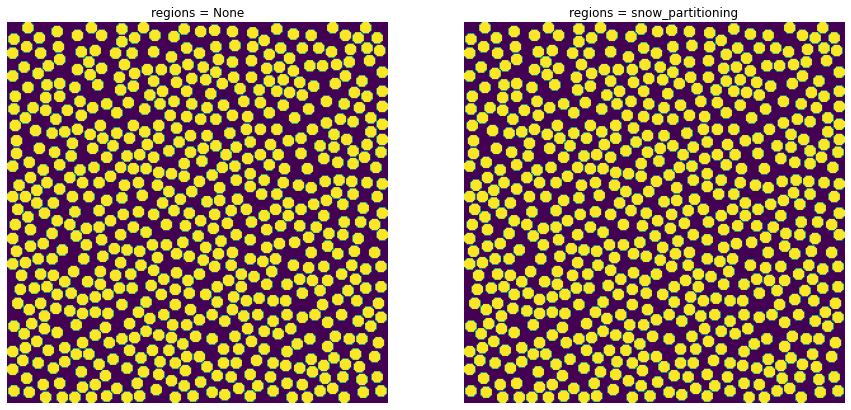

In [4]:
x = ps.filters.flood(im=im, regions=regions, mode=mode)
r = ps.filters.snow_partitioning(im, dt=None, r_max=4, sigma=0.4, return_all=False,
                      mask=True, randomize=True)
xx = ps.filters.flood(im=im, regions= r, mode=mode)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('regions = None')
ax[1].set_title('regions = snow_partitioning')

### mode
options are mean, median, max, min, and sum

Text(0.5, 1.0, 'mode = min')

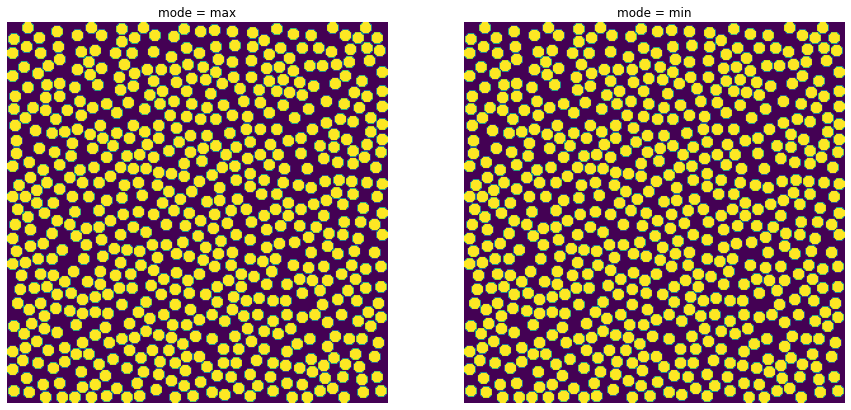

In [5]:
xx = ps.filters.flood(im=im, regions=regions, mode='min')

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('mode = max')
ax[1].set_title('mode = min')